<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Aprendizado de Máquina, Classificação 
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Classificação;</li>
  <li>Dados;</li>
  <li>Treino;</li>
  <li>Avaliação;</li>
  <li>Predição.</li>
</ol>

---

# **Exercícios**

## 1\. Pinguins 

Neste exercício, vamos utilizar uma base de dados com informações sobre penguins. A idéia é prever a espécie do penguin (**species**) baseado em suas características físicas e geográficas (variáveis preditivas).

In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
penguim = sns.load_dataset('penguins')

In [3]:
penguim.head(25)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [4]:
penguim.shape

(344, 7)

### **1.1. Análise exploratória** 

Utilize os gráficos abaixo para entender melhor a relação entre os atributos e variável resposta da base de dados. Comente o que observou em cada gráfico.

 - Atributos numéricos por espécie:

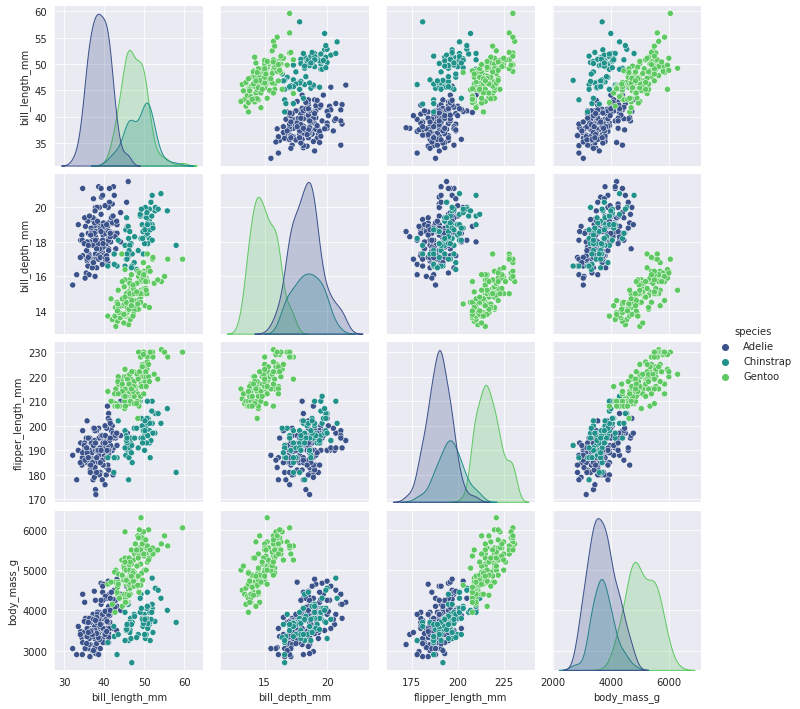

In [5]:
with sns.axes_style('darkgrid'):

  grafico = sns.pairplot(data=penguim.drop(['sex', 'island'], axis=1), hue="species", palette="viridis")

**Comentário:**

* Pinguins da espécie `Adelie` possuem maior `bill_length`.
* Pinguins da espécie `Adelie` também possuem maior `bill_depth`, enquanto os da espécie `Gentoo` possuem menor `bill_depth`.
* Pinguins da espécie `Gentoo` também possuem maior `flipper_length`.
* Pinguins da espécie `Gentoo` também possuem maior massa (`body_mass`).




 - Sexo por espécie:

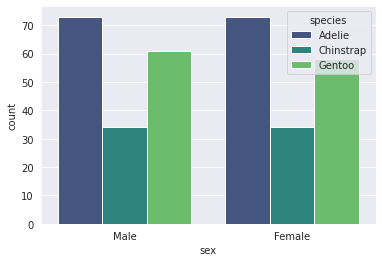

In [6]:
with sns.axes_style('darkgrid'):

  grafico = sns.countplot(data=penguim, x='sex', hue="species", palette="viridis")

**Comentário:**

* A proporção de pinguins **macho** e **fêmea** por **espécie** parece ser igual (ou muito próxima).

 - Ilha por espécie:

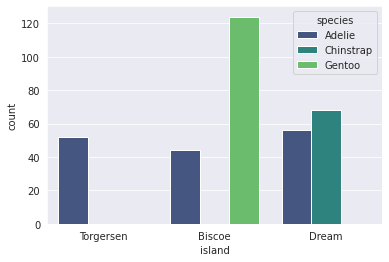

In [7]:
with sns.axes_style('darkgrid'):

  grafico = sns.countplot(data=penguim, x='island', hue="species", palette="viridis")

**Comentário:** 

* A ilha `Torgersen` só possui pinguins da espécie `Adelie`.
* A ilha `Biscoe` possui pinguins das espécies `Adelie` e `Gentoo`, onde existe aproximadamente 3 pinguins `Gentoo` para cada 1 pinguim `Adelie` (relação de **triplo**).
* A ilha `Dream` possui pinguins das espécies `Adelie` e `Chinstrap` onde existe um pouco de mais pinguins `Chinstrap` a pinguins `Adelie`.

## 2\. Dados 

### **2.1. Valores nulos** 

A base de dados possui valores faltantes, utilize os conceitos da aula para trata-los.

In [8]:
penguim.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [9]:
penguim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [10]:
penguim.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [11]:
# resposta da questão 2.1
penguim['bill_length_mm'].fillna(penguim['bill_length_mm'].mean(), inplace=True)
penguim['bill_depth_mm'].fillna(penguim['bill_depth_mm'].mean(), inplace=True)
penguim['flipper_length_mm'].fillna(penguim['flipper_length_mm'].mean(), inplace=True)
penguim['body_mass_g'].fillna(penguim['body_mass_g'].mean(), inplace=True)

In [12]:
penguim.isna().sum()

species               0
island                0
bill_length_mm        0
bill_depth_mm         0
flipper_length_mm     0
body_mass_g           0
sex                  11
dtype: int64

A coluna `sex` tem **11 dados faltantes**, podemos então, excluir essas linhas de todo o *dataframe*.


In [13]:
penguim.dropna(inplace=True, axis=0)

In [14]:
penguim.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

### **2.2. Variáveis categóricas** 

Identifique as variáveis categóricas nominais e ordinais, crie uma nova coluna aplicando a técnica correta de conversão a seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_nom*" ou "*_ord*".

> **Nota**: Você não deve tratar a variável resposta.

> **Nota**: Por definição, árvores de decisão **não precisam** da transformação de atributos categóricos em numéricos. Contudo, por **limitação** do pacote Python Scikit Learn, devemos conduzir esta etapa. Mais informações neste [link](https://scikit-learn.org/stable/modules/tree.html#tree).

In [15]:
penguim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [16]:
penguim['sex'].drop_duplicates()

0      Male
1    Female
Name: sex, dtype: object

In [17]:
# resposta da questão 2.2
penguim['island_Torgersen_nom'] = penguim['island'].apply(lambda valor: 1 if valor == 'Torgersen' else 0)
penguim['island_Biscoe_nom'] = penguim['island'].apply(lambda valor: 1 if valor == 'Biscoe' else 0)
penguim['island_Dream_nom'] = penguim['island'].apply(lambda valor: 1 if valor == 'Dream' else 0)
penguim['male_nom'] = penguim['sex'].apply(lambda valor: 1 if valor == 'Male' else 0)
penguim['female_nom'] = penguim['sex'].apply(lambda valor: 1 if valor == 'Female' else 0)

In [18]:
penguim.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,island_Torgersen_nom,island_Biscoe_nom,island_Dream_nom,male_nom,female_nom
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1,0,0,1,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1,0,0,0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1,0,0,0,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1,0,0,0,1
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,1,0,0,1,0


### **2.3. Limpeza** 

Descarte as colunas categóricas originais e mantenha a variável resposta na primeira coluna do dataframe. 

In [19]:
# resposta da questão 2.3
penguim.drop(['island','sex'], axis = 1, inplace = True)

In [20]:
penguim.head(3)

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Torgersen_nom,island_Biscoe_nom,island_Dream_nom,male_nom,female_nom
0,Adelie,39.1,18.7,181.0,3750.0,1,0,0,1,0
1,Adelie,39.5,17.4,186.0,3800.0,1,0,0,0,1
2,Adelie,40.3,18.0,195.0,3250.0,1,0,0,0,1


### **2.4. Treino/Teste** 

Separe a base de dados em treino e teste utilizando uma proporção de 2/3 para treino e 1/3 para testes. 

In [21]:
# resposta da questão 2.4
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    penguim.drop('species', axis=1),
    penguim['species'],
    test_size=0.33,
    random_state=120
)

In [22]:
print(f'x (treino): {x_train.shape}')
print(f'y (treino): {y_train.shape}')
print(f'x (teste): {x_test.shape}')
print(f'y (teste): {y_test.shape}')

x (treino): (223, 9)
y (treino): (223,)
x (teste): (110, 9)
y (teste): (110,)


## 3\. Modelagem 

### **3.1. Treino** 

Treine um modelo de **árvore de decisão** com os **dados de treino** (2/3). Gere o gráfico da árvore do modelo treinado e responda: quantas **folhas** a árvore treinada possui?

**Resposta:** 9 folhas.

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import graphviz
from sklearn import tree

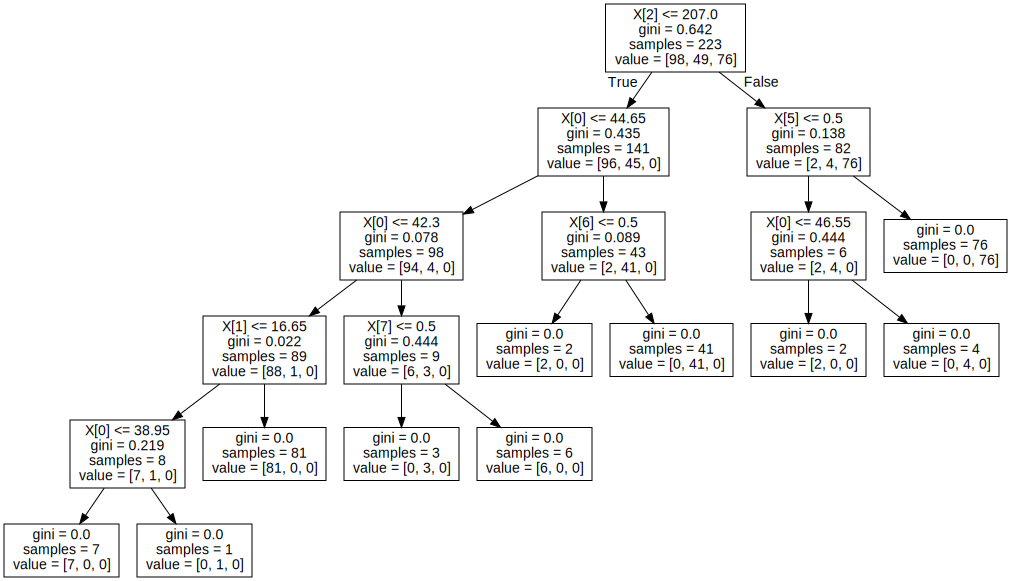

In [26]:
# resposta da questão 3.1
modelo = DecisionTreeClassifier()
modelo = modelo.fit(x_train, y_train)
dados_arvore_decisao = tree.export_graphviz(modelo, out_file = None)
graph = graphviz.Source(dados_arvore_decisao)
graph

In [27]:
modelo.__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'feature_names_in_': array(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
        'body_mass_g', 'island_Torgersen_nom', 'island_Biscoe_nom',
        'island_Dream_nom', 'male_nom', 'female_nom'], dtype=object),
 'n_features_in_': 9,
 'n_outputs_': 1,
 'classes_': array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object),
 'n_classes_': 3,
 'max_features_': 9,
 'tree_': <sklearn.tree._tree.Tree at 0x7f60eff92570>}

### **3.2. Avaliação** 

**a.** Matriz de Confusão 

Calcule e visualize a **matriz de confusão** para o modelo de **árvore de decisão** treinado com os **dados de teste** (1/3). Comente os resultados.

**Comentário:** O modelo classificou corretamente as espécies de pinguins na maioria dos casos. Em específico para a espécie **Adelie**, o modelo errou duas vezes durante a classificação. Nas demais, o modelo não errou.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


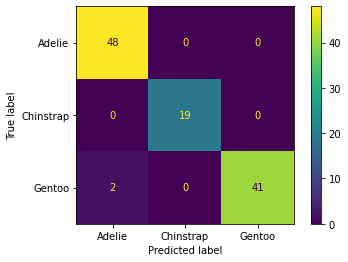

In [28]:
# resposta da questão 3.2.a
y_pred = modelo.predict(x_test)
matriz_confusao = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(modelo, x_test, y_test)
plt.show()

**b.** Acurácia

Calcule a **acurácia** para o modelo de **árvore de decisão** treinado com os **dados de teste** (1/3).

> **Nota:** Como referência, eu consegui uma acurácia de approx. 96% (sua acurácia pode não ser igual).

In [29]:
# resposta da questão 3.2.b
from sklearn.metrics import accuracy_score

acuracia = accuracy_score(y_test, y_pred)
print(f'Acurácia: {round(acuracia, 2)}')

Acurácia: 0.98


## 4\. Predição  

### **4.1. Novo penguim** 

Qual a espécie de um penguim com as seguintes características:


| island | bill_length_mm | bill_depth_mm | flipper_length_mm | body_mass_g | sex |
| --- | --- | --- | --- | --- | --- |
| Biscoe | 38.2 | 18.1 | 185.0 | 3950.0 | Male |

> **Atenção:** Lembre-se de pre-processar os atributos assim como nos exercício 2.2. A ordem dos atributos importa, deve ser a mesma usada na modelagem.

> **Nota:** Como referência eu obtive **adelie** como espécie predita (a sua predição pode não ser igual).

In [30]:
penguim.drop('species', axis=1).columns

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g',
       'island_Torgersen_nom', 'island_Biscoe_nom', 'island_Dream_nom',
       'male_nom', 'female_nom'],
      dtype='object')

In [31]:
# resposta da questão 4.1
atributos = np.array([
  38.2,
  18.1,
  185,
  2840,
  0,
  1,
  0,
  1,
  0
])

nova_predicao = modelo.predict(atributos.reshape(1, -1))
print(f'Espécie: {nova_predicao}')

Espécie: ['Adelie']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


---